In [1]:
from comut import comut
from comut import fileparsers
import palettable
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# if running in Colab, import tutorial data
import sys
plt.rcParams["font.family"] = "arial"

In [2]:
pwd!

'/Users/lmartin/Documents/2020/clonal_comut_plot'

In [2]:
combined_comut = comut.CoMut()

In [3]:
dark_12 = palettable.colorbrewer.qualitative.Dark2_8.mpl_colors

set_1 = palettable.colorbrewer.qualitative.Set1_9.mpl_colors

curl = palettable.cmocean.diverging.Curl_7.mpl_colors

prism_10 = palettable.cartocolors.qualitative.Prism_10.mpl_colors


## Combined Comut

{'Mutation type': <AxesSubplot:>}


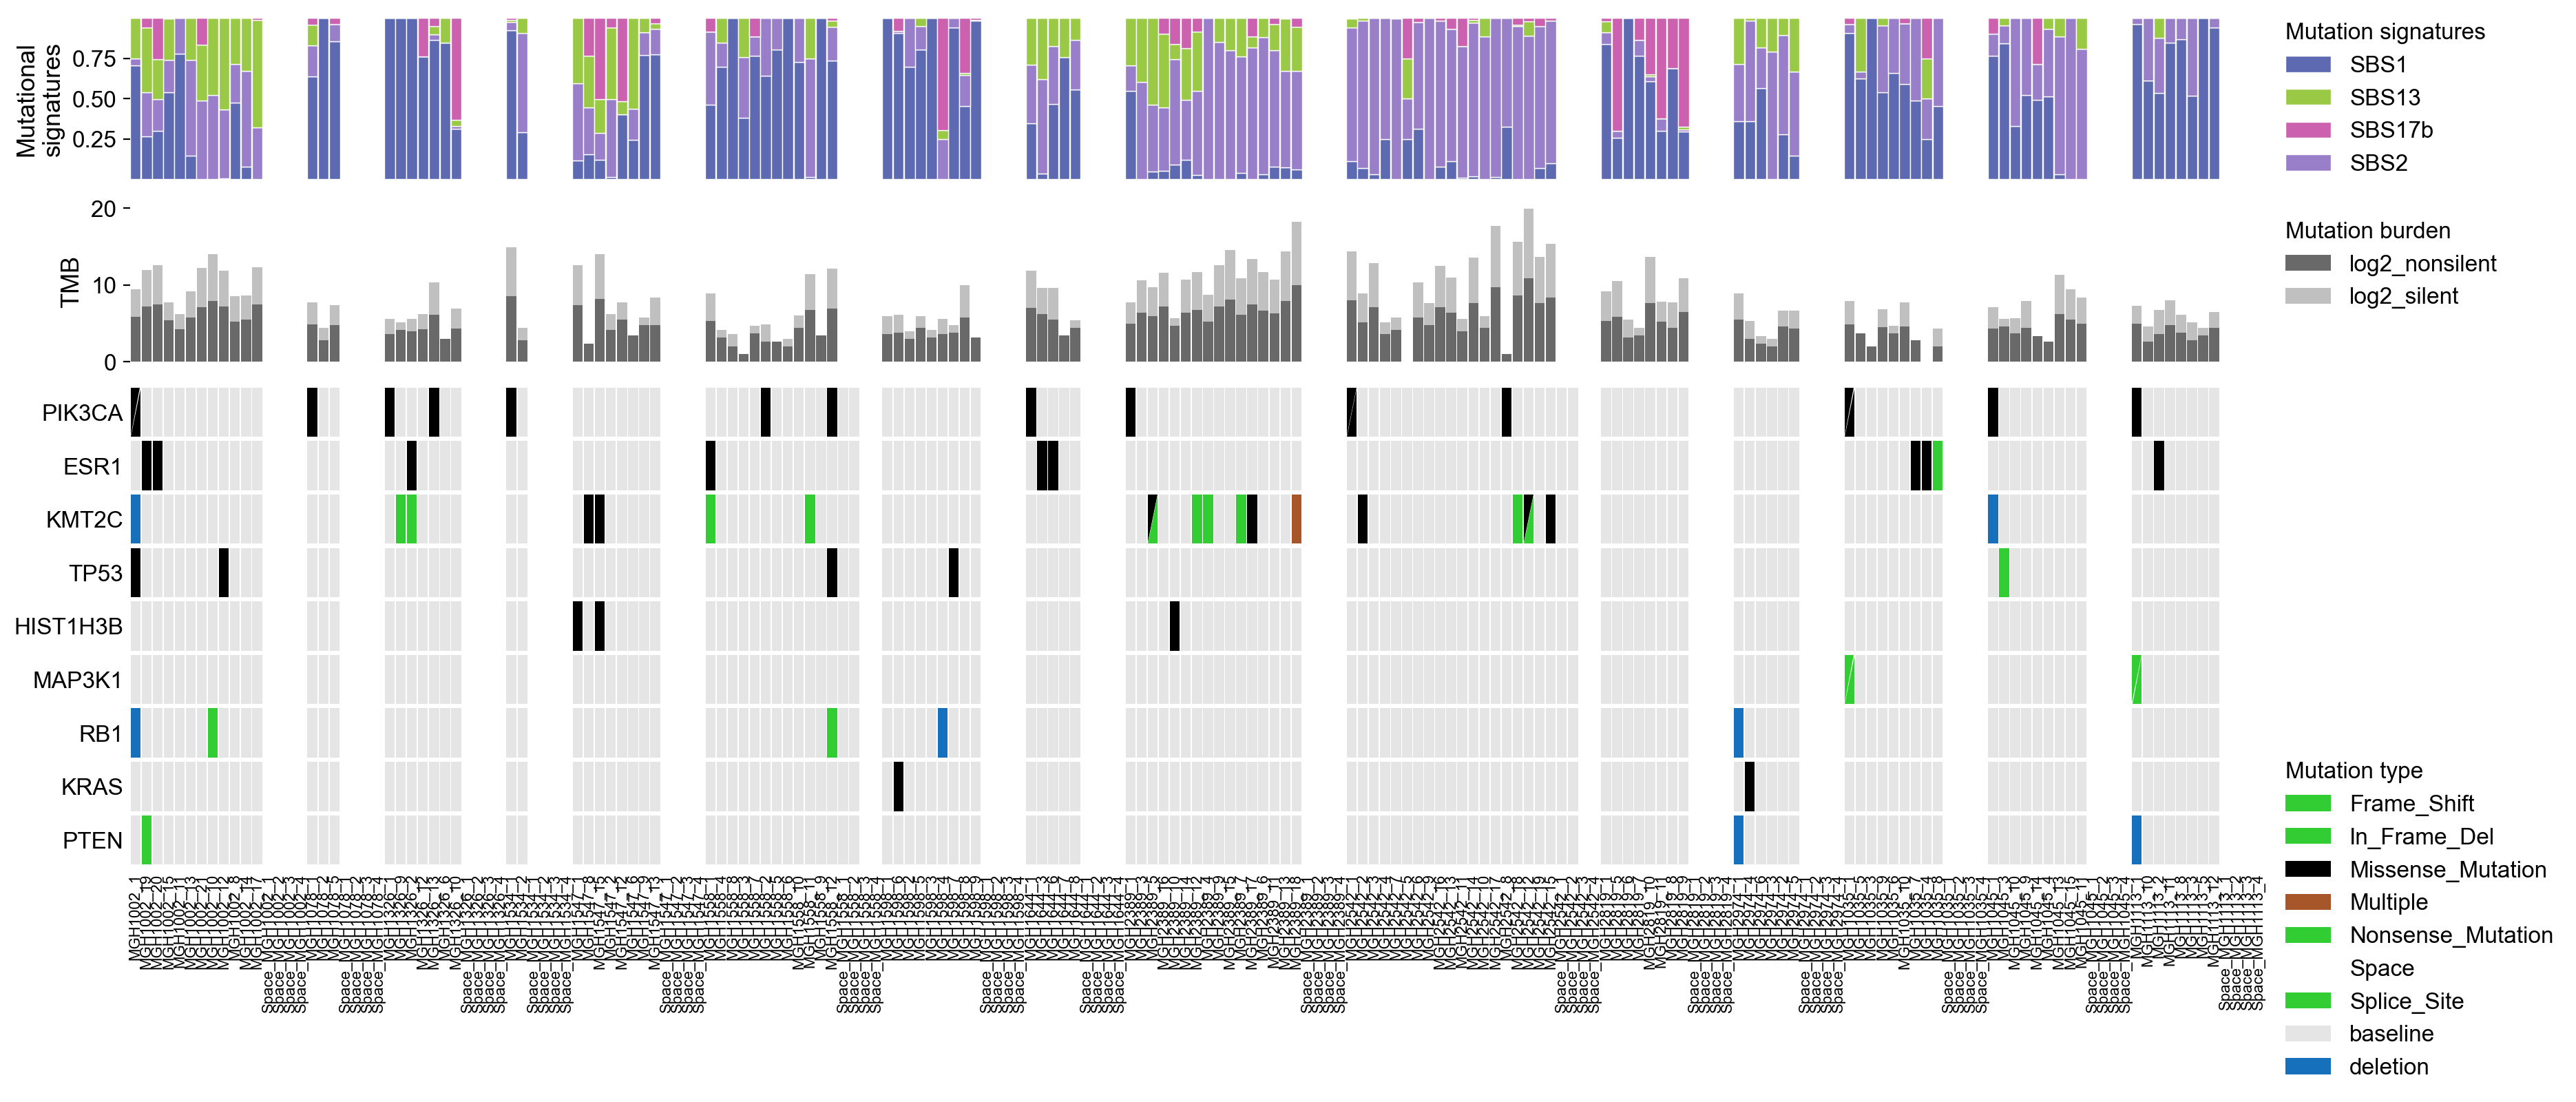

In [5]:
mutation_data = pd.read_csv("mutations_for_comut_0823.tsv", sep='\t')
mutation_sigs_data = pd.read_csv("autopsy_with_cosmic2_sigs_08212023.tsv", sep='\t')
mutation_burden_data = pd.read_csv('silent_nonsilent_0823_only_log_tmb_mut_burden.tsv', sep='\t')

sample_order = list(mutation_burden_data['sample'])
combined_comut.samples = sample_order
plt.rcParams['svg.fonttype'] = 'none'


mut_order = ['PTEN',
 'KRAS',
 'RB1',
 'MAP3K1',
 'HIST1H3B',
 'TP53',
 'KMT2C',
 'ESR1',
 'PIK3CA']

balance_6 = palettable.cmocean.diverging.Balance_6.mpl_colors
safe_10 = palettable.cartocolors.qualitative.Safe_10.mpl_colors
vivid_10 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
purp_7 = palettable.cartocolors.sequential.Purp_7.mpl_colormap


sig_mapping = {'SBS1': vivid_10[1], 'SBS2': purp_7(0.7), 'SBS5': vivid_10[5],'SBS6': vivid_10[1],'SBS13': vivid_10[3],
              'SBS17b':vivid_10[4],'Artifact':'gray'}

mut_cn_mapping_gs = {'Missense_Mutation': 'black', 'Nonsense_Mutation': 'limegreen', 'In_Frame_Del': 'limegreen',
               'Frame_Shift': 'limegreen','Splice_Site':'limegreen', 'Space': '#FFFFFF',
              'Absent': {'facecolor': 'grey', 'alpha': 0.2}, 
                'baseline': {'facecolor': 'grey', 'alpha': 0.2}, 'amplification': balance_6[-2], 
                    'deletion': balance_6[1],
               '0': {'facecolor': 'black', 'alpha': 0.5}}


burden_mapping = {'log2_nonsilent':'dimgrey',
                  'log2_silent':'silver'}

cna_mapping = {'Space': '#FFFFFF','baseline': 'white', 'amplification': balance_6[-2], 'deletion': balance_6[1],
               '0': {'facecolor': 'black', 'alpha': 0.5}}

combined_comut.add_categorical_data(mutation_data, name = 'Mutation type', category_order=mut_order, 
                                    mapping=mut_cn_mapping_gs)

combined_comut.add_bar_data(mutation_burden_data, name = 'Mutation burden', mapping = burden_mapping, stacked = True, 
                            ylabel = 'TMB')

combined_comut.add_bar_data(mutation_sigs_data, name = 'Mutational signatures', mapping = sig_mapping, stacked = True, ylabel = 'Mutational\nsignatures',
                            bar_kwargs = {'edgecolor': 'white', 'width': 0.96, 'linewidth': 0.5})

#plot
custom_rcParams = {
    'font.family': 'Arial',
    'font.size': 12,
    'axes.labelsize': 13,
    'legend.fontsize': 12,
    'xtick.labelsize': 8,
    'ytick.labelsize': 12}


matplotlib.rcParams.update(custom_rcParams)


structure = [['Mutation type'],
            ['Mutation burden'],
            ['Mutational signatures']]

print(combined_comut.axes)

combined_comut.plot_comut(x_padding = 0.05, y_padding = 0.04, tri_padding = 0.03, hspace = 0.08, structure = structure, 
                 subplot_hspace = 0.1, figsize = (20, 8))


mut_signatures_leg = combined_comut.add_axis_legend(name = 'Mutational signatures', bbox_to_anchor = (1, 1.1), title = 'Mutation signatures', ncol = 1)
mut_leg = combined_comut.add_axis_legend(name = 'Mutation type',  bbox_to_anchor = (1, 0.26), title = 'Mutation type', ncol = 1)
clonality_leg = combined_comut.add_axis_legend(name = 'Mutation burden', bbox_to_anchor = (1, 1), title='Mutation burden', ncol = 1)



## only clonal muts

{'Mutation type': <AxesSubplot:>, 'Mutation burden': <AxesSubplot:ylabel='Mutation Rate'>, 'Mutational signatures': <AxesSubplot:ylabel='Mutational\nsignatures'>}


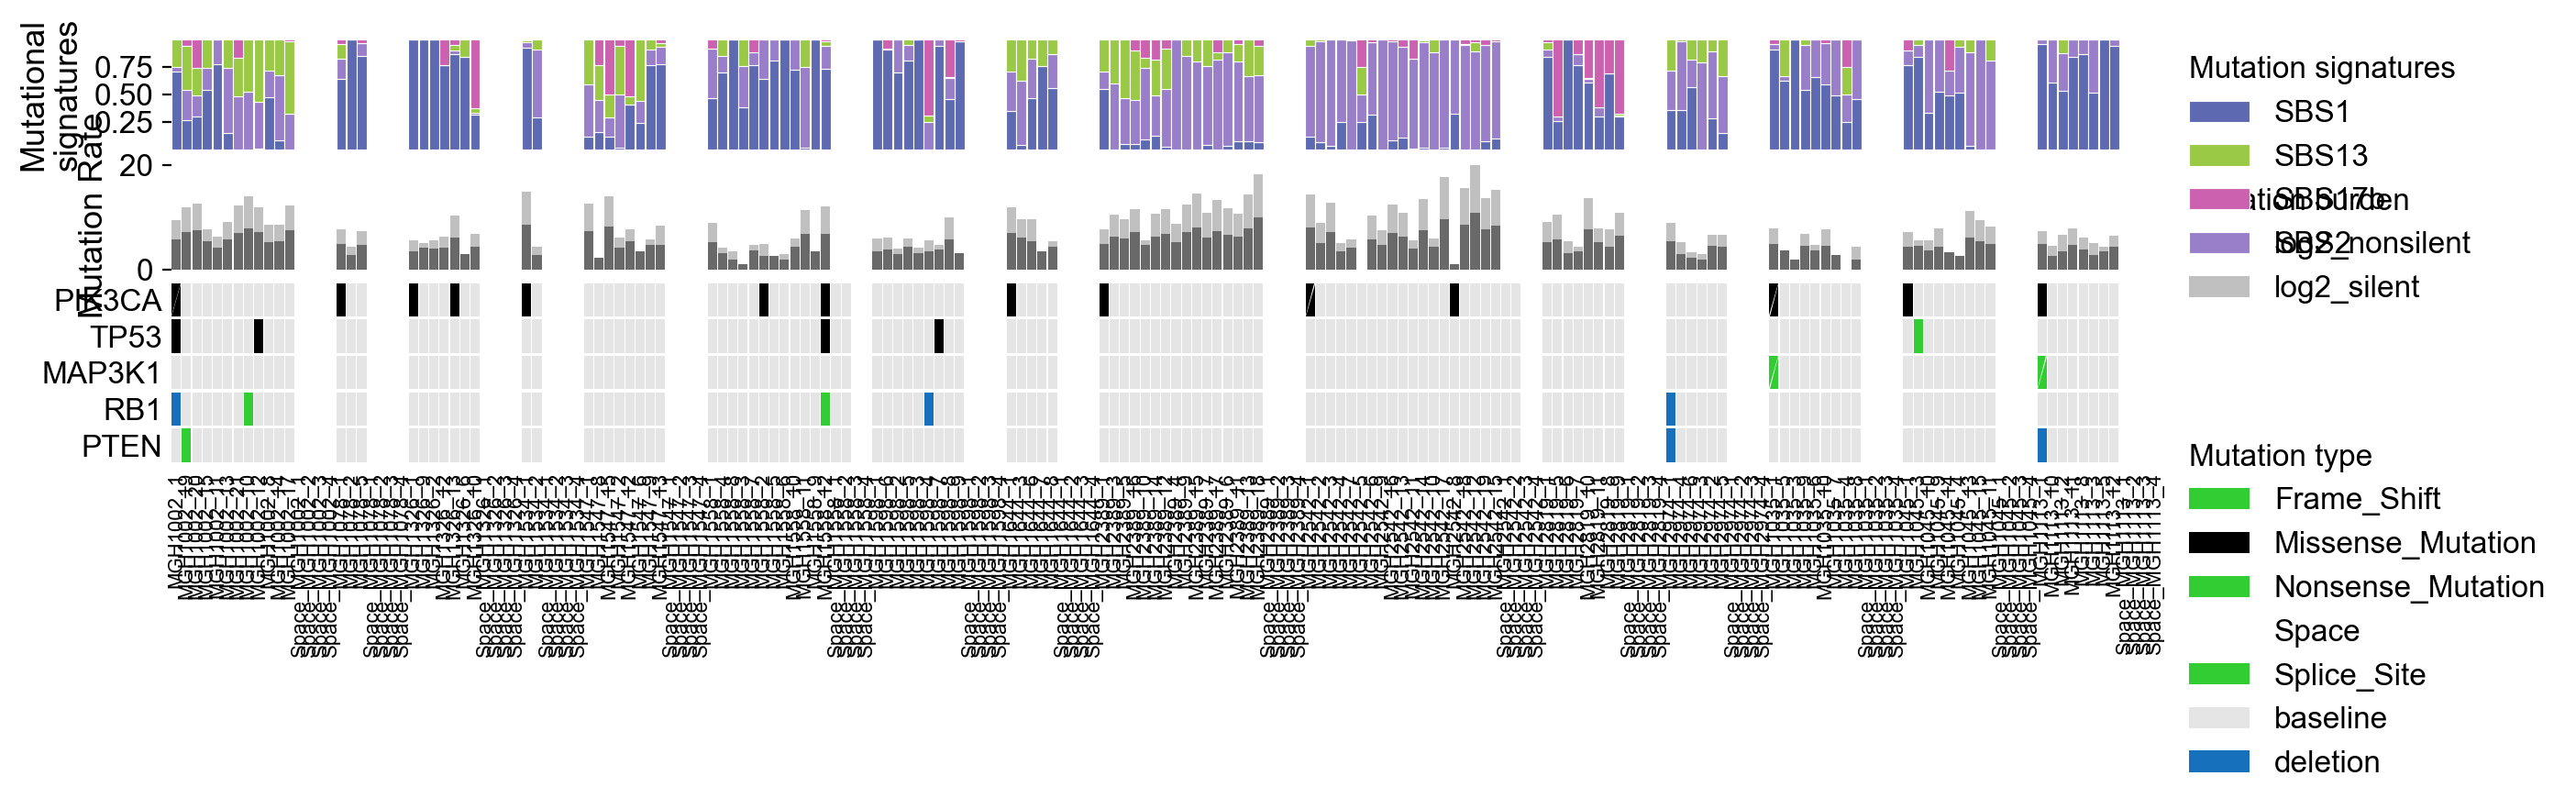

In [7]:
mutation_data = pd.read_csv("mutations_for_comut_0823.tsv", sep='\t')
mutation_sigs_data = pd.read_csv("autopsy_with_cosmic2_sigs_08212023.tsv", sep='\t')
mutation_burden_data = pd.read_csv('silent_nonsilent_0823_only_log_tmb_mut_burden.tsv', sep='\t')

sample_order = list(mutation_burden_data['sample'])
combined_comut.samples = sample_order
plt.rcParams['svg.fonttype'] = 'none'


mut_order = ['PTEN',
 'RB1',
 'MAP3K1',
 'TP53',
 'PIK3CA']



balance_6 = palettable.cmocean.diverging.Balance_6.mpl_colors
safe_10 = palettable.cartocolors.qualitative.Safe_10.mpl_colors
vivid_10 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
purp_7 = palettable.cartocolors.sequential.Purp_7.mpl_colormap


sig_mapping = {'SBS1': vivid_10[1], 'SBS2': purp_7(0.7), 'SBS5': vivid_10[5],'SBS6': vivid_10[1],'SBS13': vivid_10[3],
              'SBS17b':vivid_10[4],'Artifact':'gray'}


mut_cn_mapping_gs = {'Missense_Mutation': 'black', 'Nonsense_Mutation': 'limegreen', 'In_Frame_Del': 'limegreen',
               'Frame_Shift': 'limegreen','Splice_Site':'limegreen', 'Space': '#FFFFFF',
              'Absent': {'facecolor': 'grey', 'alpha': 0.2}, 
                'baseline': {'facecolor': 'grey', 'alpha': 0.2}, 'amplification': balance_6[-2], 
                    'deletion': balance_6[1],
               '0': {'facecolor': 'black', 'alpha': 0.5}}


burden_mapping = {'log2_nonsilent':'dimgrey',
                  'log2_silent':'silver'}

cna_mapping = {'Space': '#FFFFFF','baseline': 'white', 'amplification': balance_6[-2], 'deletion': balance_6[1],
               '0': {'facecolor': 'black', 'alpha': 0.5}}

combined_comut.add_categorical_data(mutation_data, name = 'Mutation type', category_order=mut_order, 
                                    mapping=mut_cn_mapping_gs)

combined_comut.add_bar_data(mutation_burden_data, name = 'Mutation burden', mapping = burden_mapping, stacked = True, 
                            ylabel = 'Mutation Rate')



combined_comut.add_bar_data(mutation_sigs_data, name = 'Mutational signatures', mapping = sig_mapping, stacked = True, ylabel = 'Mutational\nsignatures',
                            bar_kwargs = {'edgecolor': 'white', 'width': 0.96, 'linewidth': 0.4})

#plot
custom_rcParams = {
    'font.family': 'Arial',
    'font.size': 12,
    'axes.labelsize': 13,
    'legend.fontsize': 12,
    'xtick.labelsize': 8,
    'ytick.labelsize': 12}


matplotlib.rcParams.update(custom_rcParams)


structure = [['Mutation type'],
            ['Mutation burden'],
            ['Mutational signatures']]

print(combined_comut.axes)

combined_comut.plot_comut(x_padding = 0.05, y_padding = 0.04, tri_padding = 0.03, hspace = 0.08, structure = structure, 
                 subplot_hspace = 0.1, figsize = (14, 3))


mut_signatures_leg = combined_comut.add_axis_legend(name = 'Mutational signatures', bbox_to_anchor = (1, 1.1), title = 'Mutation signatures', ncol = 1)
mut_leg = combined_comut.add_axis_legend(name = 'Mutation type',  bbox_to_anchor = (1, 0.26), title = 'Mutation type', ncol = 1)
clonality_leg = combined_comut.add_axis_legend(name = 'Mutation burden', bbox_to_anchor = (1, 1), title='Mutation burden', ncol = 1)




In [31]:
combined_comut.figure.savefig('/Users/lmartin/Documents/2020/clonal_comut_plot/predominantly_clonal_muts_0707.svg', 
                             bbox_inches = 'tight', dpi = 300, format='svg', )

## only subclonal muts

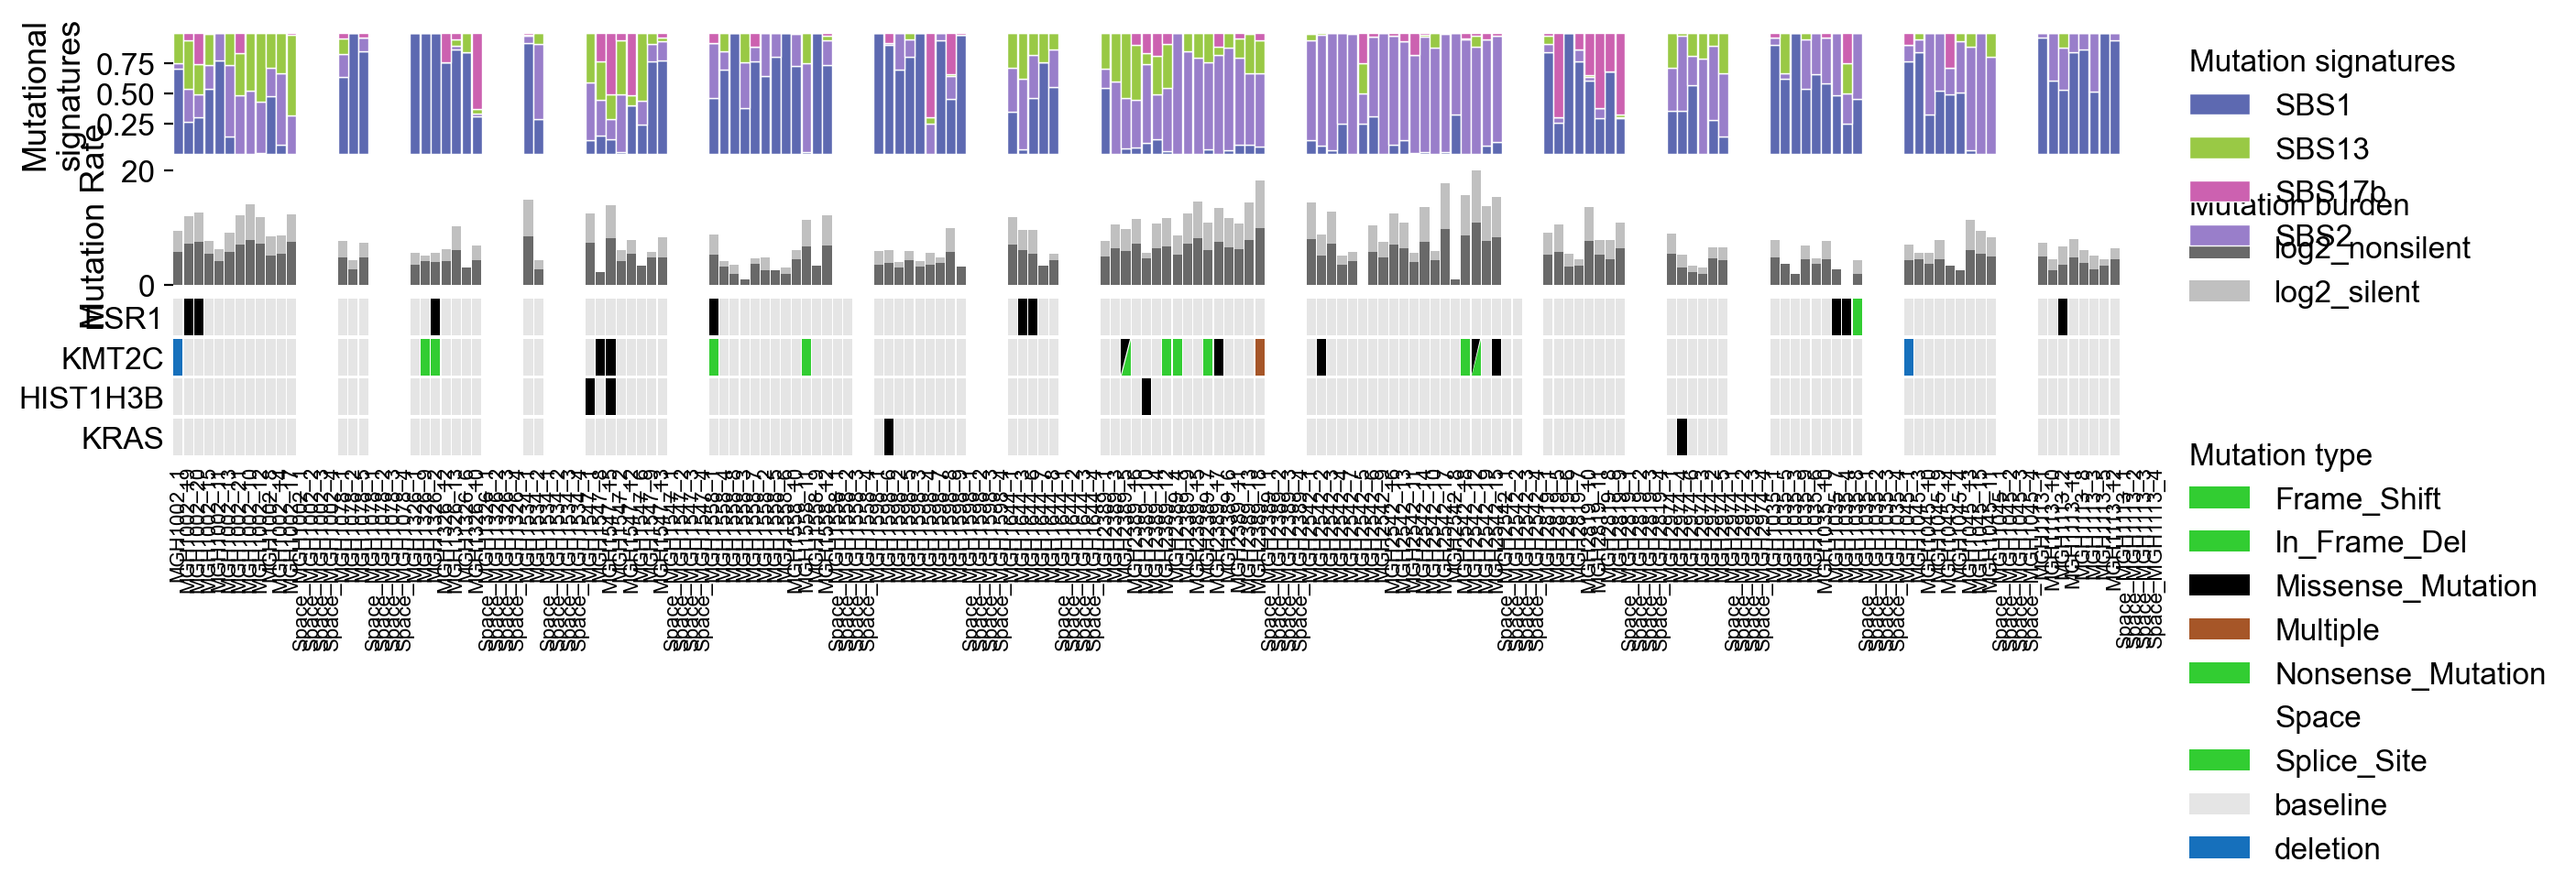

In [8]:
mutation_data = pd.read_csv("mutations_for_comut_0823.tsv", sep='\t')
mutation_sigs_data = pd.read_csv("autopsy_with_cosmic2_sigs_08212023.tsv", sep='\t')
mutation_burden_data = pd.read_csv('silent_nonsilent_0823_only_log_tmb_mut_burden.tsv', sep='\t')


sample_order = list(mutation_burden_data['sample'])
combined_comut.samples = sample_order
plt.rcParams['svg.fonttype'] = 'none'


mut_order = [
 'KRAS',
 'HIST1H3B',
 'KMT2C',
 'ESR1']


balance_6 = palettable.cmocean.diverging.Balance_6.mpl_colors
safe_10 = palettable.cartocolors.qualitative.Safe_10.mpl_colors
vivid_10 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
purp_7 = palettable.cartocolors.sequential.Purp_7.mpl_colormap

sig_mapping = {'SBS1': vivid_10[1], 'SBS2': purp_7(0.7), 'SBS5': vivid_10[5],'SBS6': vivid_10[1],'SBS13': vivid_10[3],
              'SBS17b':vivid_10[4],'Artifact':'gray'}


mut_cn_mapping_gs = {'Missense_Mutation': 'black', 'Nonsense_Mutation': 'limegreen', 'In_Frame_Del': 'limegreen',
               'Frame_Shift': 'limegreen','Splice_Site':'limegreen', 'Space': '#FFFFFF',
              'Absent': {'facecolor': 'grey', 'alpha': 0.2}, 
                'baseline': {'facecolor': 'grey', 'alpha': 0.2}, 'amplification': balance_6[-2], 
                    'deletion': balance_6[1],
               '0': {'facecolor': 'black', 'alpha': 0.5}}

burden_mapping = {'log2_nonsilent':'dimgrey',
                  'log2_silent':'silver'}


combined_comut.add_categorical_data(mutation_data, name = 'Mutation type', category_order=mut_order, 
                                    mapping=mut_cn_mapping_gs)

combined_comut.add_bar_data(mutation_burden_data, name = 'Mutation burden', mapping = burden_mapping, stacked = True, 
                            ylabel = 'Mutation Rate')



combined_comut.add_bar_data(mutation_sigs_data, name = 'Mutational signatures', mapping = sig_mapping, stacked = True, ylabel = 'Mutational\nsignatures',
                            bar_kwargs = {'edgecolor': 'white', 'width': 0.96, 'linewidth': 0.5})

#plot
custom_rcParams = {
    'font.family': 'Arial',
    'font.size': 12,
    'axes.labelsize': 13,
    'legend.fontsize': 12,
    'xtick.labelsize': 8,
    'ytick.labelsize': 12}


matplotlib.rcParams.update(custom_rcParams)


structure = [['Mutation type'],
            ['Mutation burden'],
            ['Mutational signatures']]


combined_comut.plot_comut(x_padding = 0.05, y_padding = 0.04, tri_padding = 0.03, hspace = 0.08, structure = structure, 
                 subplot_hspace = 0.1, figsize = (14, 3))


mut_signatures_leg = combined_comut.add_axis_legend(name = 'Mutational signatures', bbox_to_anchor = (1, 1.1), title = 'Mutation signatures', ncol = 1)
mut_leg = combined_comut.add_axis_legend(name = 'Mutation type',  bbox_to_anchor = (1, 0.26), title = 'Mutation type', ncol = 1)
clonality_leg = combined_comut.add_axis_legend(name = 'Mutation burden', bbox_to_anchor = (1, 1), title='Mutation burden', ncol = 1)


In [33]:
combined_comut.figure.savefig('/Users/lmartin/Documents/2020/clonal_comut_plot/predominantly_subclonal_muts_0707.svg', 
                             bbox_inches = 'tight', dpi = 300, format='svg', )

In [5]:
combined_comut.figure.savefig('/Users/lmartin/Documents/2020/clonal_comut_plot/all_cdk4_comut_clonally_mutated_genes.svg', 
                             bbox_inches = 'tight', dpi = 300, format='svg', )